一、读取数据

In [221]:
import pandas as pd
import numpy as np

In [222]:
data = pd.read_csv('meizhuang.csv')
print('data shape:',data.shape)
data

data shape: (27598, 7)


,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂
...,...,...,...,...,...,...,...
27593,2016/11/5,A535642405757,SK-II【11-11】全新大眼眼霜skii放大双眼眼部修护精华紧致,590.0,NaN,NaN,SKII
27594,2016/11/5,A535911851408,SK-II 11-11预售skii大眼眼霜sk2眼部修护精华霜淡化黑眼圈,590.0,NaN,NaN,SKII
27595,2016/11/5,A537027211850,SK-II 11-11预售skii前男友护肤面膜sk2精华面膜贴密集修护,1740.0,NaN,NaN,SKII
27596,2016/11/5,A538212160126,SK-II 11-11预售skiisk2神仙水护肤精华油面部套装滋润补水密集修,1190.0,NaN,NaN,SKII


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   update_time    27598 non-null  object 
 1   id             27598 non-null  object 
 2   title          27598 non-null  object 
 3   price          27598 non-null  float64
 4   sale_count     25244 non-null  float64
 5   comment_count  25244 non-null  float64
 6   店名             27598 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


In [224]:
data['店名'].value_counts()

店名
悦诗风吟    3021
佰草集     2265
欧莱雅     1974
雅诗兰黛    1810
倩碧      1704
美加净     1678
欧珀莱     1359
妮维雅     1329
相宜本草    1313
兰蔻      1285
娇兰      1193
自然堂     1190
玉兰油     1135
兰芝      1091
美宝莲      825
资生堂      821
植村秀      750
薇姿       746
雅漾       663
雪花秀      543
SKII     469
蜜丝佛陀     434
Name: count, dtype: int64

二、数据清洗

2.1重复数据处理

In [227]:
data_deal = data.drop_duplicates(inplace=False)

In [228]:
data_deal.shape

(27512, 7)

27598-27512=86 少了86行

In [230]:
data_deal.reset_index(inplace=True,drop=True)

2.2 缺失值处理

由于空值是指该商品一件未卖出，因此用0填充空值

In [233]:
#数据的描述性统计
data_deal.describe()

,price,sale_count,comment_count
count,27512.000000,2.516200e+04,25162.000000
mean,363.423512,1.231605e+04,1121.741197
std,614.876153,5.241236e+04,5277.781581
min,1.000000,0.000000e+00,0.000000
25%,99.000000,2.780000e+02,21.000000
50%,205.000000,1.443000e+03,153.000000
75%,390.000000,6.353000e+03,669.000000
max,11100.000000,1.923160e+06,202930.000000


In [234]:
mode_01 = data_deal.sale_count.mode()
mode_02 = data_deal.comment_count.mode()
print('mode_01:',mode_01)
print('mode_02:',mode_02)

mode_01: 0    0.0
Name: sale_count, dtype: float64
mode_02: 0    0.0
Name: comment_count, dtype: float64


可知售卖量和评论量的众数都是0,所以用0 填充空值

In [236]:
data_deal.isnull().any()

update_time      False
id               False
title            False
price            False
sale_count        True
comment_count     True
店名               False
dtype: bool

可知sale_count和comment_count这两列有空值

In [238]:
data_deal.isnull().sum()

update_time         0
id                  0
title               0
price               0
sale_count       2350
comment_count    2350
店名                  0
dtype: int64

In [239]:
#填充空值
data_deal= data_deal.fillna(0)

In [240]:
data_deal.isnull().sum()

update_time      0
id               0
title            0
price            0
sale_count       0
comment_count    0
店名               0
dtype: int64

对商品标题进行分类

In [242]:
import jieba

In [243]:
title_cut =[]
for i in data_deal.title:
    j = jieba.lcut(i)
    title_cut.append(j)

In [244]:
data_deal['cut_name']=title_cut
data_deal[['title','cut_name']].head()

,title,cut_name
0,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."
2,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型..."
3,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g..."
4,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,..."


In [245]:
# 给商品添加分类
sub_type = []   #子类别
main_type = []  #主类别
basic_config_data = """护肤品	套装	套装							
护肤品	乳液类	乳液	美白乳	润肤乳	凝乳	柔肤液'	亮肤乳	菁华乳	修护乳
护肤品	眼部护理	眼霜	眼部精华	眼膜					
护肤品	面膜类	面膜													
护肤品	清洁类	洗面	洁面	清洁	卸妆	洁颜	洗颜	去角质	磨砂						
护肤品	化妆水	化妆水	爽肤水	柔肤水	补水露	凝露	柔肤液	精粹水	亮肤水	润肤水	保湿水	菁华水	保湿喷雾	舒缓喷雾
护肤品	面霜类	面霜	日霜	晚霜	柔肤霜	滋润霜	保湿霜	凝霜	日间霜	晚间霜	乳霜	修护霜	亮肤霜	底霜	菁华霜
护肤品	精华类	精华液	精华水	精华露	精华素										
护肤品	防晒类	防晒霜	防晒喷雾												
化妆品	口红类	唇釉	口红	唇彩											
化妆品	底妆类	散粉	蜜粉	粉底液	定妆粉 	气垫	粉饼	BB	CC	遮瑕	粉霜	粉底膏	粉底霜		
化妆品	眼部彩妆	眉粉	染眉膏	眼线	眼影	睫毛膏									
化妆品	修容类	鼻影	修容粉	高光	腮红										
其他	其他	其他"""


In [246]:
category_config_map = {}
for config_line in basic_config_data.split('\n'):
    basic_cateogry_list = config_line.strip().strip('\n').strip('\t').split('\t')
    main_category = basic_cateogry_list[0]
    sub_category = basic_cateogry_list[1]
    unit_category_list = basic_cateogry_list[2:-1]
    for unit_category in unit_category_list:
        if unit_category and unit_category.strip().strip('\t'):
            category_config_map[unit_category] = (main_category,sub_category)

In [247]:
category_config_map

{'乳液': ('护肤品', '乳液类'),
 '美白乳': ('护肤品', '乳液类'),
 '润肤乳': ('护肤品', '乳液类'),
 '凝乳': ('护肤品', '乳液类'),
 "柔肤液'": ('护肤品', '乳液类'),
 '亮肤乳': ('护肤品', '乳液类'),
 '菁华乳': ('护肤品', '乳液类'),
 '眼霜': ('护肤品', '眼部护理'),
 '眼部精华': ('护肤品', '眼部护理'),
 '洗面': ('护肤品', '清洁类'),
 '洁面': ('护肤品', '清洁类'),
 '清洁': ('护肤品', '清洁类'),
 '卸妆': ('护肤品', '清洁类'),
 '洁颜': ('护肤品', '清洁类'),
 '洗颜': ('护肤品', '清洁类'),
 '去角质': ('护肤品', '清洁类'),
 '化妆水': ('护肤品', '化妆水'),
 '爽肤水': ('护肤品', '化妆水'),
 '柔肤水': ('护肤品', '化妆水'),
 '补水露': ('护肤品', '化妆水'),
 '凝露': ('护肤品', '化妆水'),
 '柔肤液': ('护肤品', '化妆水'),
 '精粹水': ('护肤品', '化妆水'),
 '亮肤水': ('护肤品', '化妆水'),
 '润肤水': ('护肤品', '化妆水'),
 '保湿水': ('护肤品', '化妆水'),
 '菁华水': ('护肤品', '化妆水'),
 '保湿喷雾': ('护肤品', '化妆水'),
 '面霜': ('护肤品', '面霜类'),
 '日霜': ('护肤品', '面霜类'),
 '晚霜': ('护肤品', '面霜类'),
 '柔肤霜': ('护肤品', '面霜类'),
 '滋润霜': ('护肤品', '面霜类'),
 '保湿霜': ('护肤品', '面霜类'),
 '凝霜': ('护肤品', '面霜类'),
 '日间霜': ('护肤品', '面霜类'),
 '晚间霜': ('护肤品', '面霜类'),
 '乳霜': ('护肤品', '面霜类'),
 '修护霜': ('护肤品', '面霜类'),
 '亮肤霜': ('护肤品', '面霜类'),
 '底霜': ('护肤品', '面霜类'),
 '精华液': ('护肤品', '精华类'),
 '精

In [248]:
for i in range(len(data_deal)):
    exist = False
    for temp in data_deal.cut_name[i]:
        if temp in category_config_map:
            sub_type.append(category_config_map.get(temp)[1])
            main_type.append(category_config_map.get(temp)[0])
            exist = True
            break
    if not exist:
        sub_type.append('其他')
        main_type.append('其他')

In [249]:
print(len(sub_type),len(main_type),len(data_deal))

27512 27512 27512


In [250]:
data_deal['sub_type'] = sub_type
data_deal['main_type'] = main_type
print(data_deal['sub_type'].value_counts())
data_deal['main_type'].value_counts()

sub_type
其他      13100
清洁类      2922
面霜类      2675
化妆水      1955
底妆类      1790
乳液类      1352
眼部护理     1114
精华类       727
口红类       715
眼部彩妆      604
防晒类       494
修容类        64
Name: count, dtype: int64


main_type
其他     13100
护肤品    11239
化妆品     3173
Name: count, dtype: int64

In [251]:
#我们添加是否为男士专用为一列
gender = []
for i in range(len(data_deal)):
    if '男' in data_deal.cut_name[i]:
        gender.append('是')
    elif '男士' in data_deal.cut_name[i]:
        gender.append('是')
    elif '男生' in data_deal.cut_name[i]:
        gender.append('是')
    else:
        gender.append('否')

data_deal['是否男士专用'] = gender
data_deal['是否男士专用'].value_counts()

是否男士专用
否    25310
是     2202
Name: count, dtype: int64

In [252]:
# 新增销售额列：销售额=销售量*价格
data_deal['销售额'] = data_deal.sale_count*data_deal.price

In [253]:
#新增购买日期为一列
data_deal['update_time'] = pd.to_datetime(data_deal['update_time'])
data_deal= data_deal.set_index('update_time')
data_deal['day'] = data_deal.index.day

In [254]:
#删除中文分词那一列
del data_deal['cut_name']

In [255]:
data_deal

,id,title,price,sale_count,comment_count,店名,sub_type,main_type,是否男士专用,销售额,day
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,面霜类,护肤品,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,乳液类,护肤品,否,1575668.0,14
2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,化妆水,护肤品,否,1254132.0,14
2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,清洁类,护肤品,是,980590.0,14
2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,面霜类,护肤品,否,722244.0,14
...,...,...,...,...,...,...,...,...,...,...,...
2016-11-05,A535642405757,SK-II【11-11】全新大眼眼霜skii放大双眼眼部修护精华紧致,590.0,0.0,0.0,SKII,眼部护理,护肤品,否,0.0,5
2016-11-05,A535911851408,SK-II 11-11预售skii大眼眼霜sk2眼部修护精华霜淡化黑眼圈,590.0,0.0,0.0,SKII,眼部护理,护肤品,否,0.0,5
2016-11-05,A537027211850,SK-II 11-11预售skii前男友护肤面膜sk2精华面膜贴密集修护,1740.0,0.0,0.0,SKII,其他,其他,否,0.0,5


上面就是整理好的表格，其中套装被归入了其他类

三、数据分析

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_deal.columns

Index(['id', 'title', 'price', 'sale_count', 'comment_count', '店名', 'sub_type',
       'main_type', '是否男士专用', '销售额', 'day'],
      dtype='object')

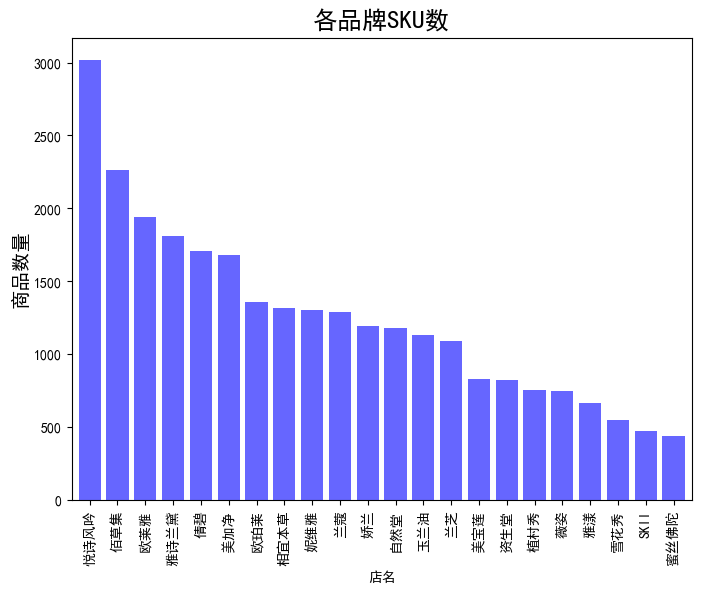

In [259]:
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体  
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题


plt.figure(figsize=(8,6))
data_deal['店名'].value_counts().sort_values(ascending=False).plot.bar(width=0.8,alpha = 0.6,color = 'b')
plt.title('各品牌SKU数',fontsize = 18)#品牌SKU数就是各品牌的商品数
plt.ylabel('商品数量',fontsize = 14)
plt.show()

图形分析：

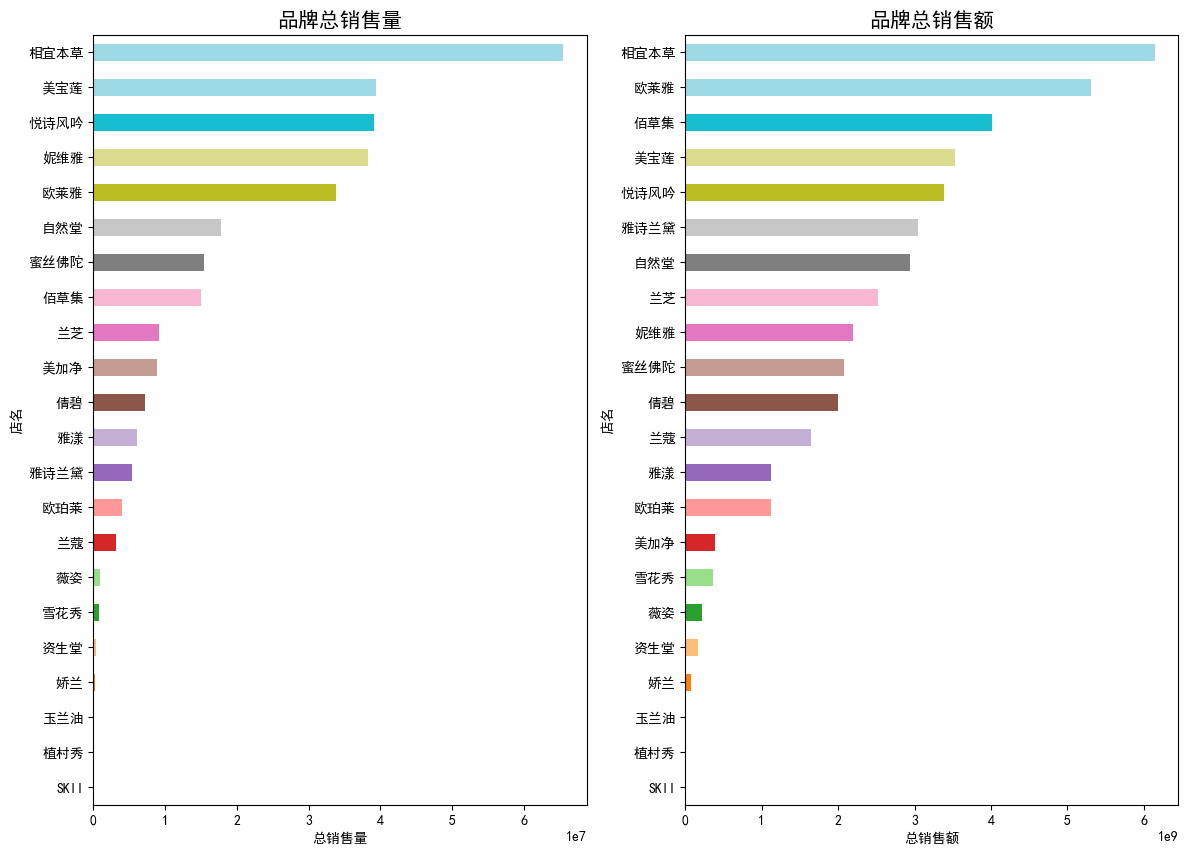

In [261]:
#各品牌的总销售量和销售额
cmap = plt.cm.tab20  # 使用 tab20 颜色映射
fig,axes = plt.subplots(1,2,figsize = (14,10))
colors = cmap(np.linspace(0, 1, data_deal['店名'].nunique()))
ax1 = data_deal.groupby('店名').sale_count.sum().sort_values(ascending = True).plot(kind = 'barh',ax = axes[0],color = colors)

ax1.set_title('品牌总销售量',fontsize = 15)
ax1.set_xlabel('总销售量')

ax2 = data_deal.groupby('店名')['销售额'].sum().sort_values().plot(kind = 'barh',ax = axes[1],color = colors)
ax2.set_title('品牌总销售额',fontsize = 15)
ax2.set_xlabel('总销售额')

plt.show()

图像分析：

In [263]:
data1 = data_deal.groupby('main_type')['sale_count'].sum()
data1

main_type
其他     133453819.0
化妆品     43079714.0
护肤品    133363023.0
Name: sale_count, dtype: float64

In [264]:
data2 = data_deal.groupby('sub_type')['sale_count'].sum()
data2

sub_type
乳液类      11974994.0
修容类        339687.0
其他      133453819.0
化妆水      24766531.0
口红类      12732472.0
底妆类      23083538.0
清洁类      59701823.0
眼部彩妆      6924017.0
眼部护理      8404318.0
精华类       2010843.0
防晒类       8669759.0
面霜类      17834755.0
Name: sale_count, dtype: float64

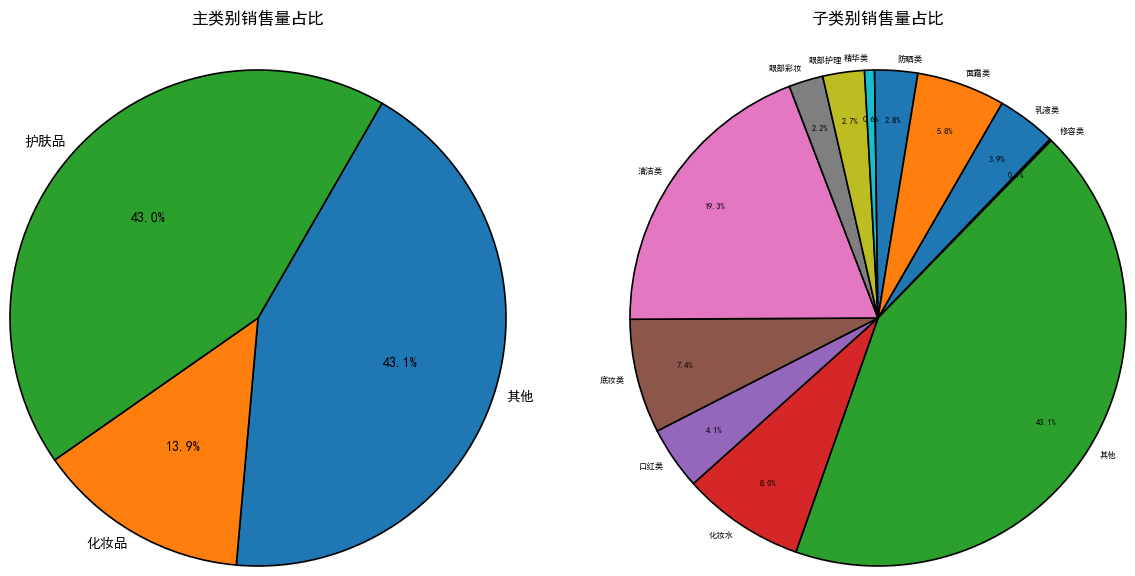

In [265]:
fig,axes = plt.subplots(1,2,figsize = (12,10))
data1 = data_deal.groupby('main_type')['sale_count'].sum()
ax1 = data1.plot(kind = 'pie',ax = axes[0],autopct = '%.1f%%',  #设置百分比格式，并保留一位小数
pctdistance = 0.6,#百分比标签到圆心的距离
labels = data1.index,
labeldistance = 1.05 ,#标签与圆心的距离
startangle = 60 ,#初始角度
radius = 2 ,#饼图半径
counterclock = False, #设置为顺时针
wedgeprops = {'linewidth':1.2,'edgecolor' : 'k'}, #设置饼图内外边界的属性
textprops = {'fontsize' :10,'color': 'k'}  #设置文本属性
)#设计饼图的细节

ax1.set_title('主类别销售量占比',fontsize = 12,pad =100) 
ax1.yaxis.set_visible(False)#隐藏纵轴标签

data2 = data_deal.groupby('sub_type')['sale_count'].sum()
ax2 = data2.plot(kind = 'pie',ax = axes[1],autopct = '%.1f%%' ,    #设置百分比格式，并保留一位小数
pctdistance = 0.8,#百分比标签到圆心的距离
labels = data2.index,
labeldistance = 1.05 ,#标签与圆心的距离
startangle = 60 ,#初始角度
radius = 2,#饼图半径
counterclock = False, #设置为顺时针
wedgeprops = {'linewidth':1.2,'edgecolor' : 'k'}, #设置饼图内外边界的属性
textprops = {'fontsize' :6,'color': 'k'}  #设置文本属性
)#设计饼图的细节

ax2.set_title('子类别销售量占比',fontsize = 12,pad =100) 
ax2.yaxis.set_visible(False)#隐藏纵轴标签

plt.subplots_adjust(wspace = 1)
plt.show()


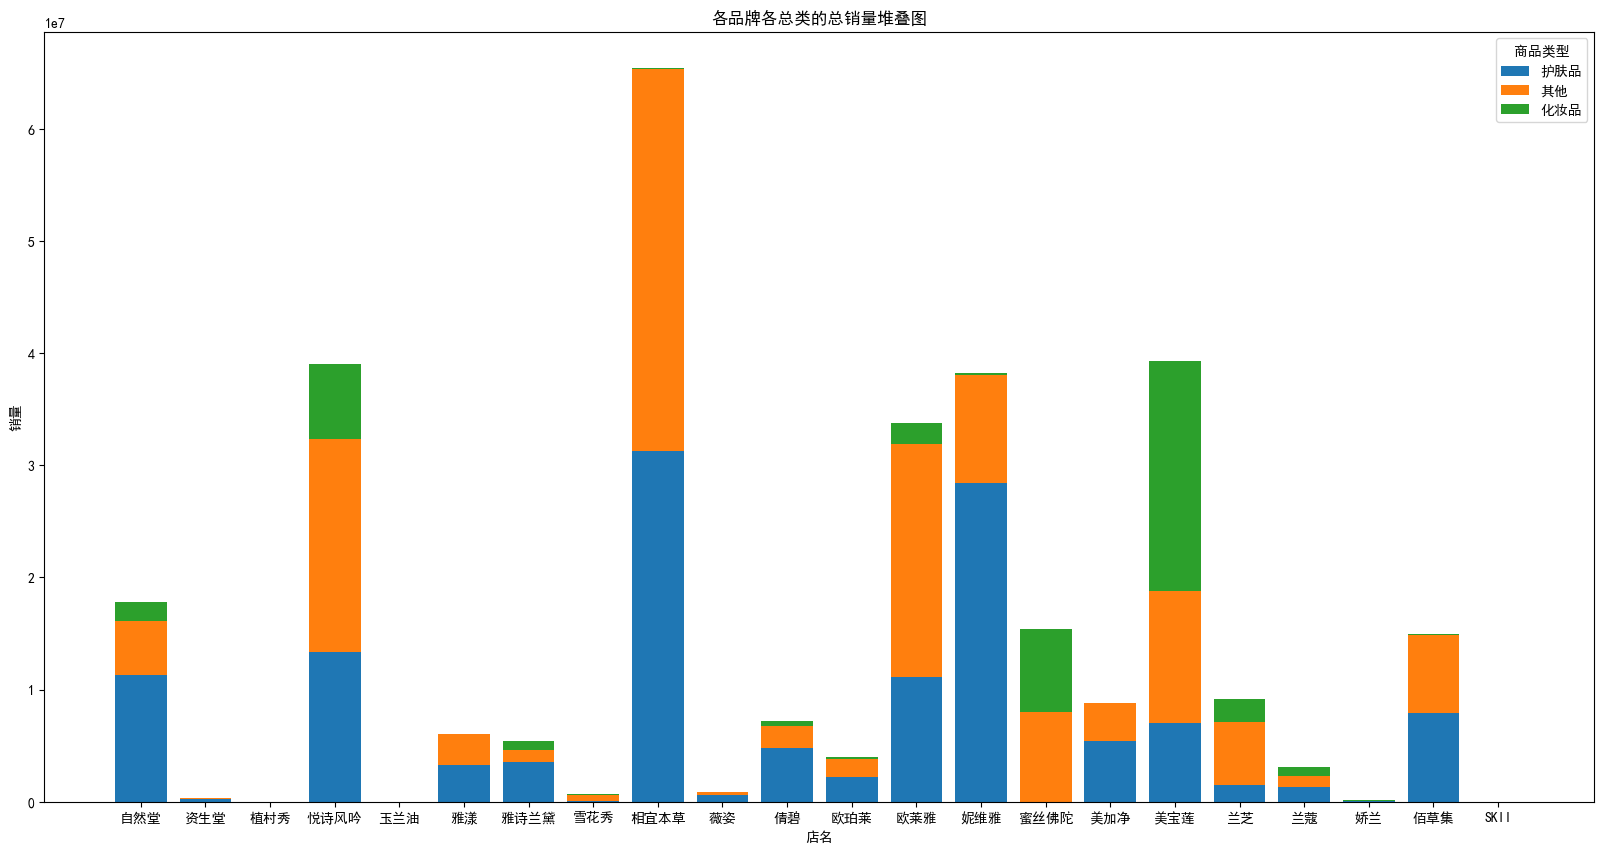

In [266]:
#准备数据
stores = data_deal['店名'].unique()
main_types = data_deal['main_type'].unique()
sales_data = {store: {t: 0 for t in main_types} for store in stores}
for _, row in data_deal.iterrows():
    sales_data[row['店名']][row['main_type']] += row['sale_count']

# 绘制堆叠柱状图
fig, ax = plt.subplots(figsize=(20, 10))

# 初始化底部位置
bottom = [0] * len(stores)

# 遍历每个类型，绘制堆叠条形
for t in main_types:
    sales = [sales_data[store][t] for store in stores]
    ax.bar(stores, sales, bottom=bottom, label=t)
    bottom = [b + s for b, s in zip(bottom, sales)]

# 添加标题和标签
plt.title('各品牌各总类的总销量堆叠图')
plt.xlabel('店名')
plt.ylabel('销量')
plt.legend(title='商品类型')


plt.show()

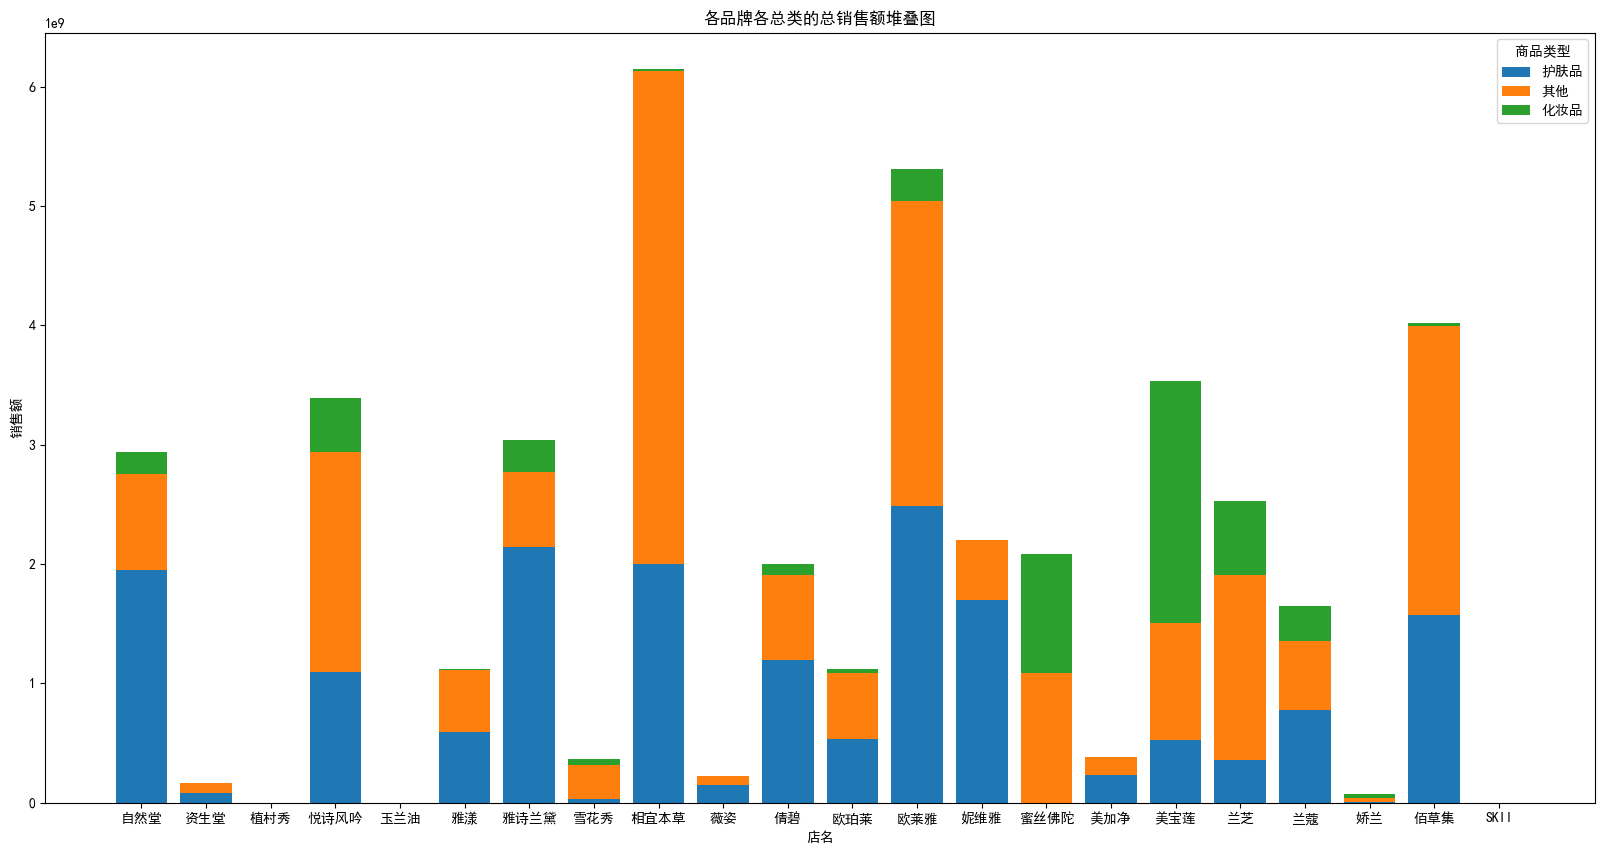

In [267]:
#准备数据
sales_money = {store: {t: 0 for t in main_types} for store in stores}
for _, row in data_deal.iterrows():
    sales_money[row['店名']][row['main_type']] += row['销售额']

# 绘制堆叠柱状图
fig, ax = plt.subplots(figsize=(20, 10))

# 初始化底部位置
bottom = [0] * len(stores)

# 遍历每个类型，绘制堆叠条形
for t in main_types:
    sales = [sales_money[store][t] for store in stores]
    ax.bar(stores, sales, bottom=bottom, label=t)
    bottom = [b + s for b, s in zip(bottom, sales)]

# 添加标题和标签
plt.title('各品牌各总类的总销售额堆叠图')
plt.xlabel('店名')
plt.ylabel('销售额')
plt.legend(title='商品类型')


plt.show()

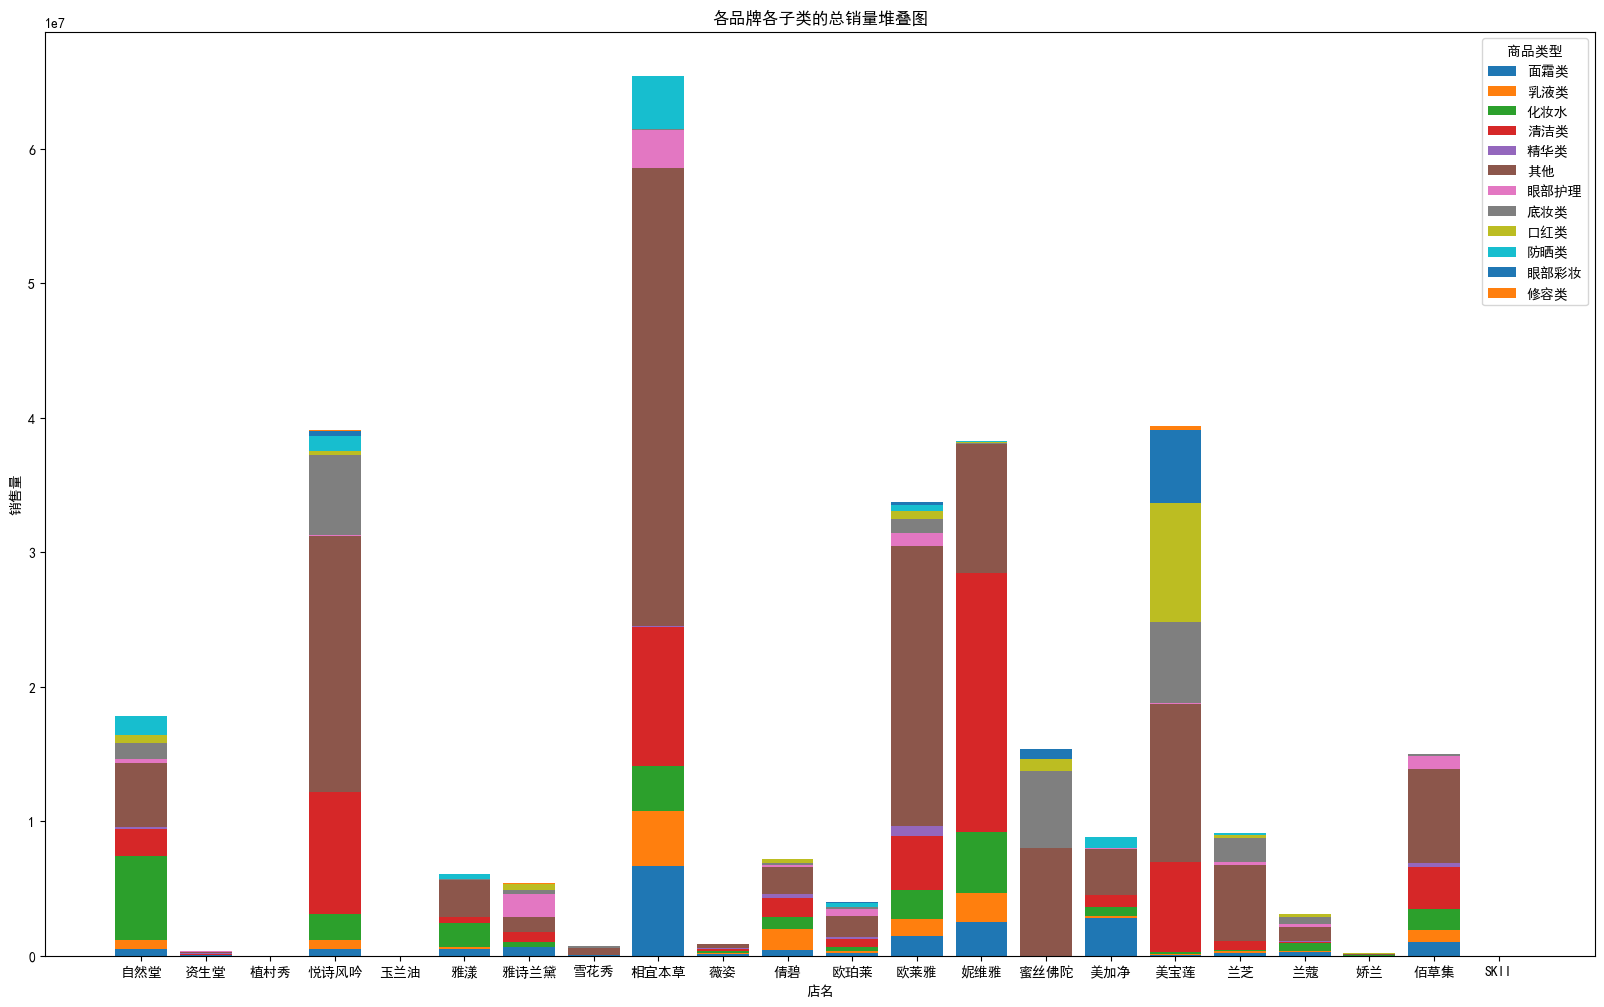

In [268]:
# 准备数据
stores = data_deal['店名'].unique()
sub_types = data_deal['sub_type'].unique()
sales_data1 = {store: {t: 0 for t in sub_types} for store in stores}
for _, row in data_deal.iterrows():
    sales_data1[row['店名']][row['sub_type']] += row['sale_count']

# 绘制堆叠柱状图
fig, ax = plt.subplots(figsize=(20, 12))

# 初始化底部位置
bottom = [0] * len(stores)

# 遍历每个类型，绘制堆叠条形
for t in sub_types:
    sales = [sales_data1[store][t] for store in stores]
    ax.bar(stores, sales, bottom=bottom, label=t)
    bottom = [b + s for b, s in zip(bottom, sales)]

# 添加标题和标签
plt.title('各品牌各子类的总销量堆叠图')
plt.xlabel('店名')
plt.ylabel('销售量')
plt.legend(title='商品类型')

# 设置 y 轴范围
max_sales = max([sum(sales_data1[store].values()) for store in stores])  # 计算最大总销量
plt.ylim(0, max_sales * 1.05)  # 设置 y 轴上限为最大总销量的 1.05 倍

# 显示图表
plt.show()

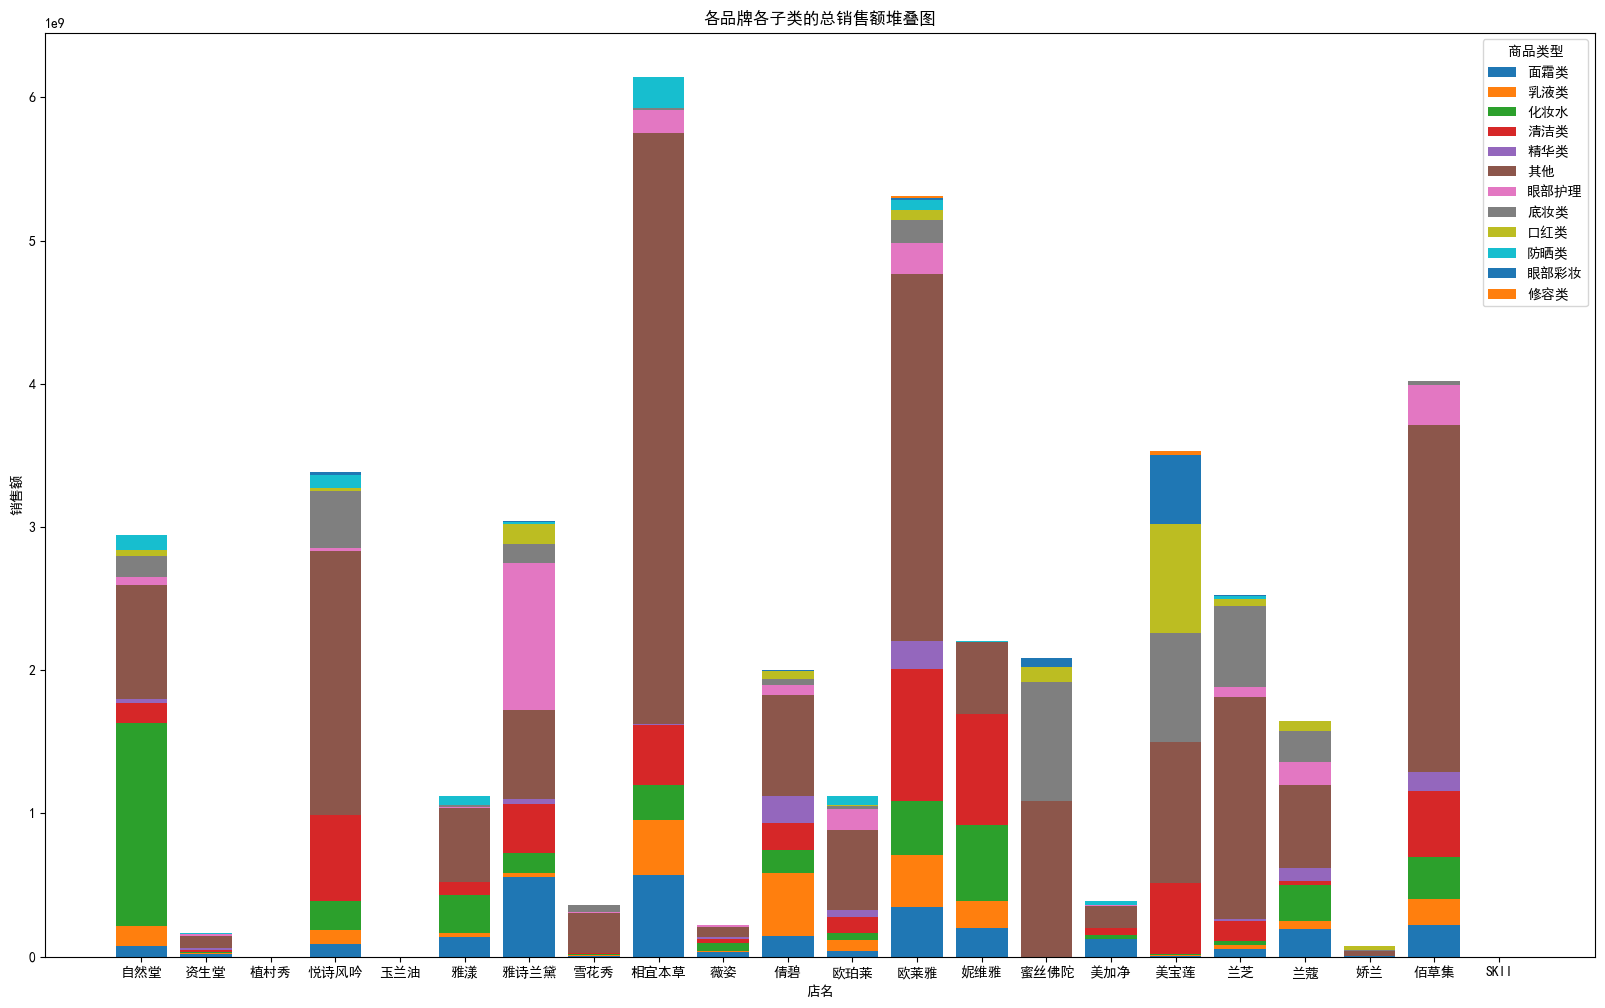

In [269]:
# 准备数据
stores = data_deal['店名'].unique()
sub_types = data_deal['sub_type'].unique()
sales_money1 = {store: {t: 0 for t in sub_types} for store in stores}
for _, row in data_deal.iterrows():
    sales_money1[row['店名']][row['sub_type']] += row['销售额']

# 绘制堆叠柱状图
fig, ax = plt.subplots(figsize=(20, 12))

# 初始化底部位置
bottom = [0] * len(stores)

# 遍历每个类型，绘制堆叠条形
for t in sub_types:
    sales = [sales_money1[store][t] for store in stores]
    ax.bar(stores, sales, bottom=bottom, label=t)
    bottom = [b + s for b, s in zip(bottom, sales)]

# 添加标题和标签
plt.title('各品牌各子类的总销售额堆叠图')
plt.xlabel('店名')
plt.ylabel('销售额')
plt.legend(title='商品类型')

# 设置 y 轴范围
max_sales = max([sum(sales_money1[store].values()) for store in stores])  # 计算最大总销量
plt.ylim(0, max_sales * 1.05)  # 设置 y 轴上限为最大总销量的 1.1 倍

# 显示图表
plt.show()

各品牌热度

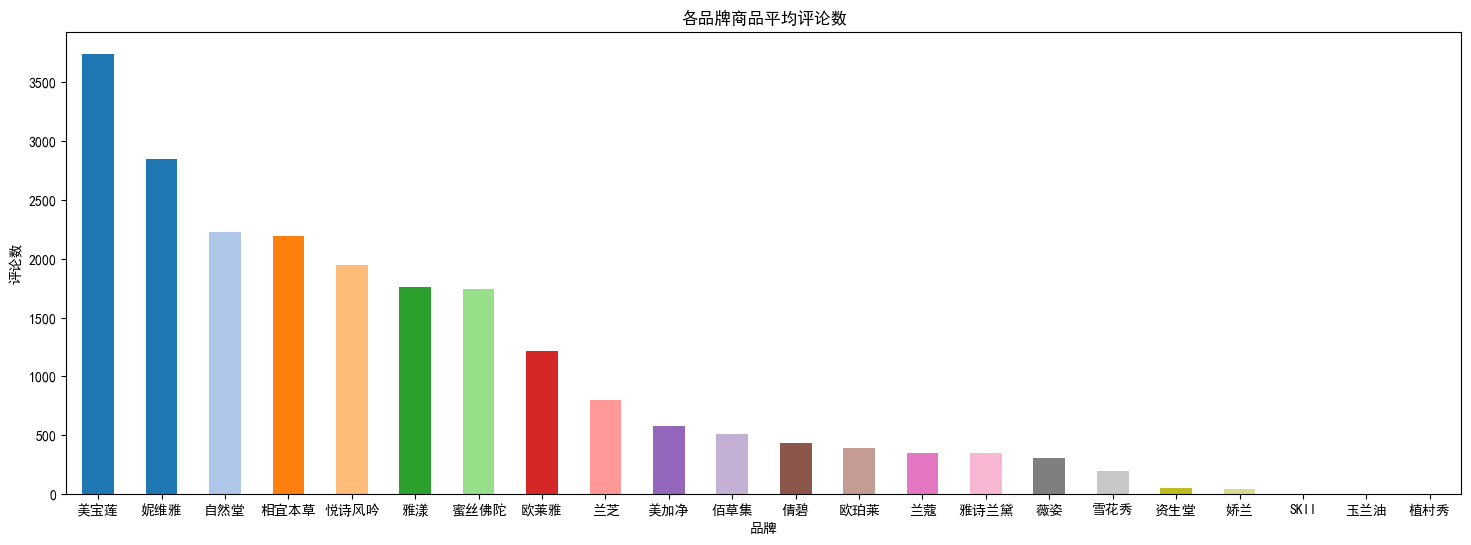

In [271]:

data_deal.groupby('店名').comment_count.mean().sort_values(ascending = False).plot(kind = 'bar',color = colors,figsize=(18, 6),title='各品牌商品平均评论数',xlabel = '品牌',ylabel='评论数',rot=0)

plt.show()

C:\Users\cy262\AppData\Local\Temp\ipykernel_15784\570630206.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt[i], xy=(x[i], y[i]))


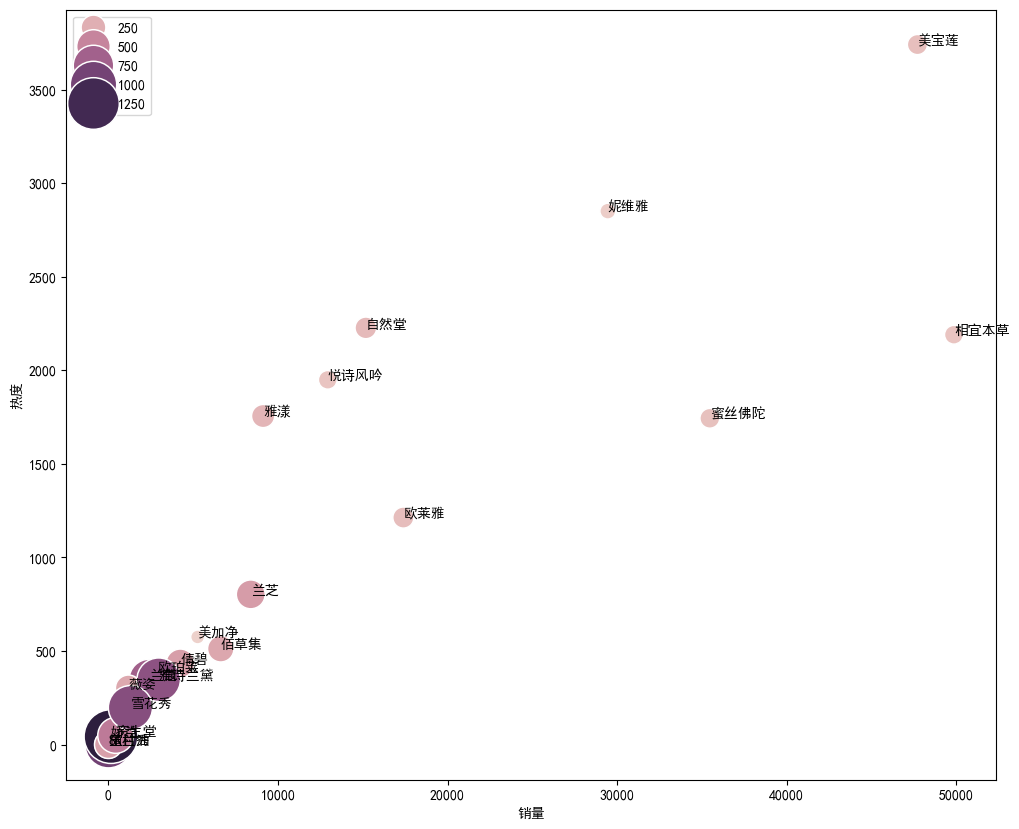

In [272]:
# 数据准备
x = data_deal.groupby('店名')['sale_count'].mean()
y = data_deal.groupby('店名')['comment_count'].mean()
s = data_deal.groupby('店名')['price'].mean()
txt = data_deal.groupby('店名')['price'].mean().index

# 绘制散点图
plt.figure(figsize=(12, 10))
sns.scatterplot(x=x, y=y, size=s, hue=s, sizes=(100, 1500))

# 添加店名标注
for i in range(len(txt)):
    plt.annotate(txt[i], xy=(x[i], y[i]))

# 添加标题和标签
plt.ylabel('热度')
plt.xlabel('销量')

# 显示图例
plt.legend(loc='upper left')

# 显示图表
plt.show()

C:\Users\cy262\AppData\Local\Temp\ipykernel_15784\911695018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='店名',y='price',data=data_deal, palette='Accent')


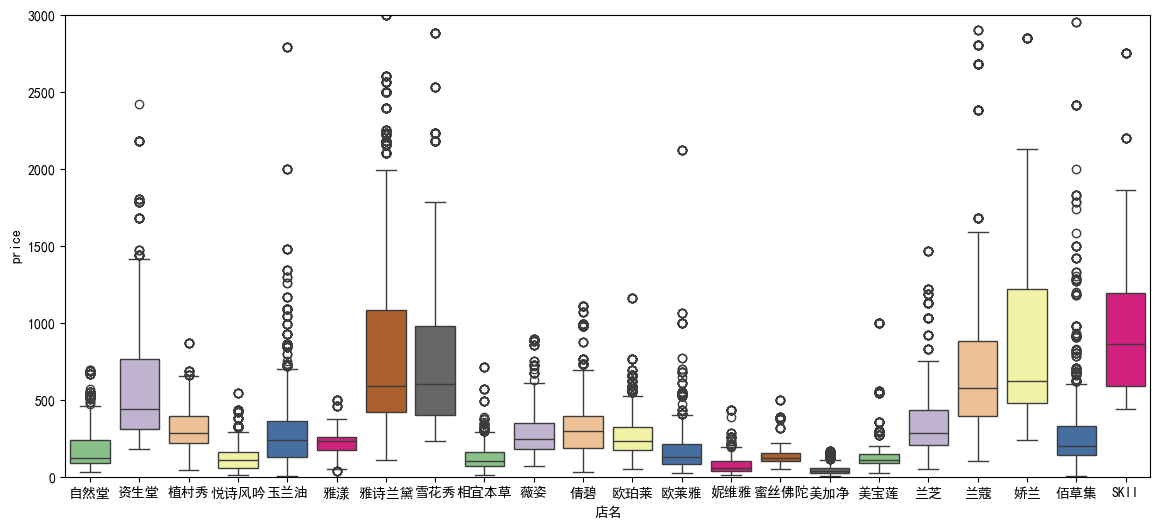

In [273]:
#查看价格的箱型图
plt.figure(figsize=(14,6))
sns.boxplot(x='店名',y='price',data=data_deal, palette='Accent')
plt.ylim(0,3000)#如果不限制，就不容易看清箱型，所以把Y轴刻度缩小为0-3000
plt.show()

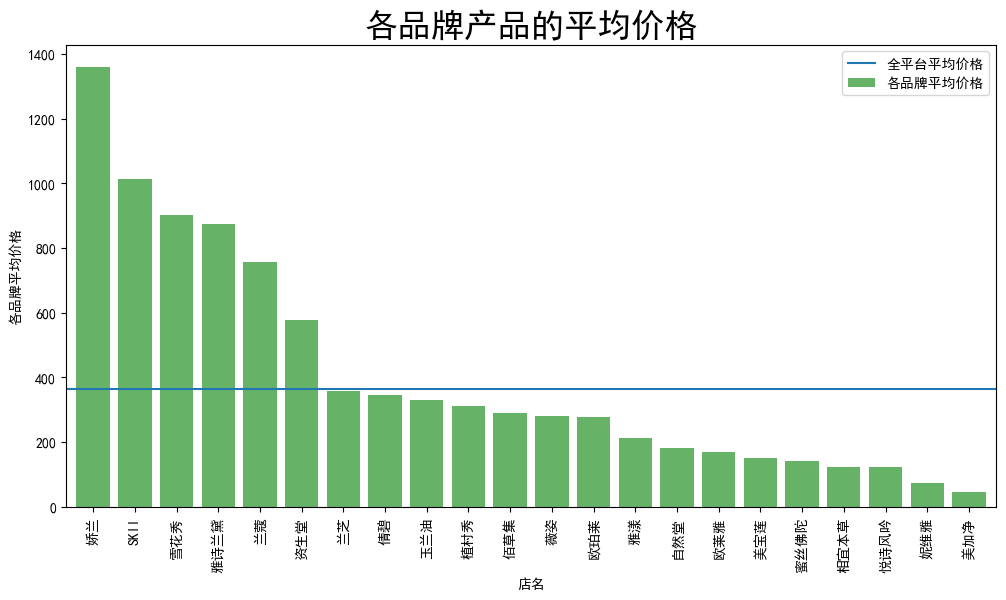

In [274]:
#查看各品牌平均价格
avg_price = data_deal.groupby('店名').price.sum()/data_deal.groupby('店名').price.count()
fig = plt.figure(figsize=(12,6))
avg_price.sort_values(ascending=False).plot(kind = 'bar',width = 0.8,alpha = 0.6,color = 'green',label = '各品牌平均价格')
total_mean = data_deal['price'].mean()
plt.axhline(total_mean,0,1,label='全平台平均价格')
plt.ylabel('各品牌平均价格')
plt.title('各品牌产品的平均价格',fontsize = 24)
plt.legend(loc='best')
    
plt.show()

C:\Users\cy262\AppData\Local\Temp\ipykernel_15784\2694006127.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt[i],xy=(x[i],y[i]),xytext = (x[i]+0.2, y[i]+0.2))  #在散点后面增加品牌信息的标签


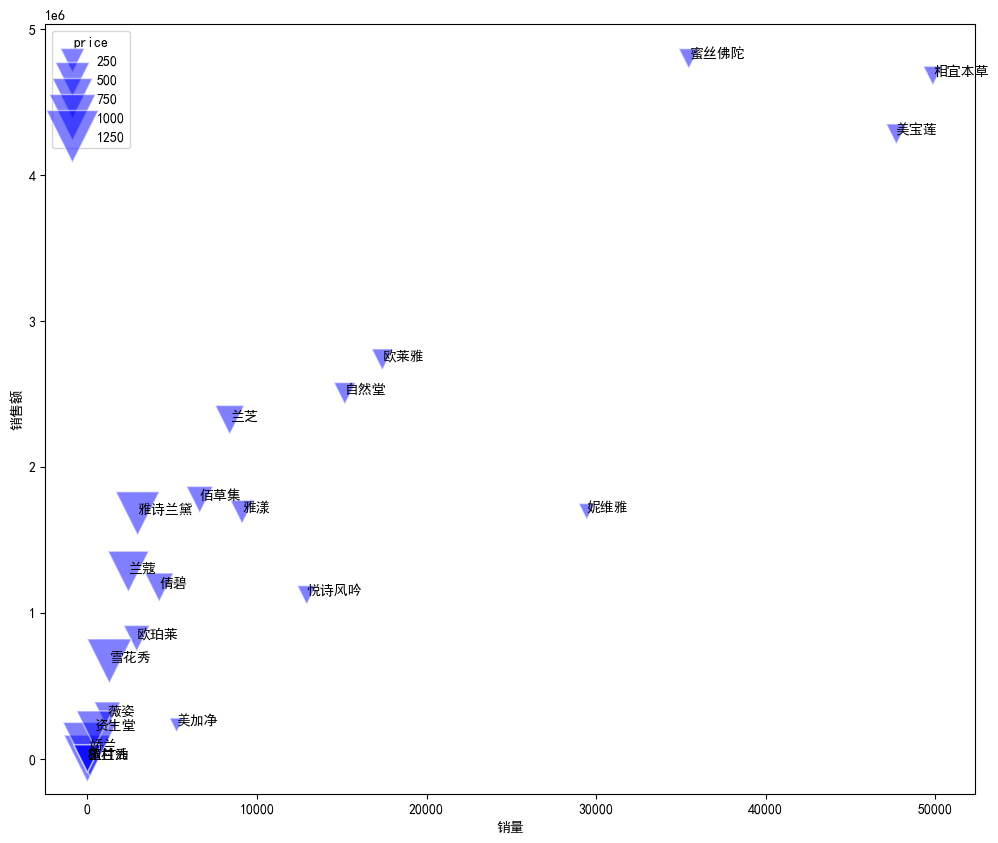

In [275]:
#销售额和销售量的散点图
plt.figure(figsize = (12,10))

x= data_deal.groupby('店名')['sale_count'].mean()
y= data_deal.groupby('店名')['销售额'].mean()
s=avg_price
sns.scatterplot(x=x,y=y,size =s,sizes=(100,1500),marker = 'v',alpha=0.5,color='b',data=data_deal)
for i in range(len(txt)):
    plt.annotate(txt[i],xy=(x[i],y[i]),xytext = (x[i]+0.2, y[i]+0.2))  #在散点后面增加品牌信息的标签
plt.xlabel('销量')
plt.show()

男士护肤品销量情况

C:\Users\cy262\AppData\Local\Temp\ipykernel_15784\3955946684.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='店名',y='sale_count',hue='main_type',data=man_data_distinct,saturation=0.75,ci=0)


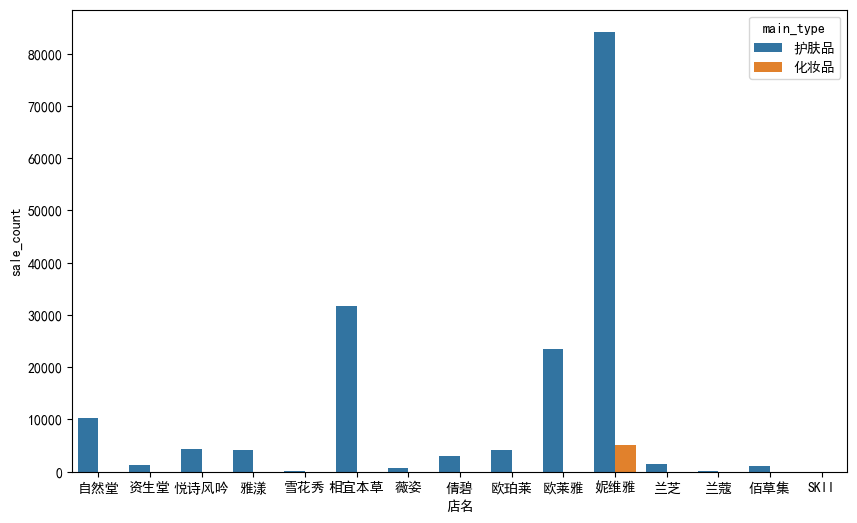

In [277]:
man_data= data_deal[data_deal['是否男士专用']=='是']
categories = ['护肤品', '化妆品']
man_data_distinct = man_data[man_data.main_type.isin(categories)]
plt.figure(figsize=(10, 6))
sns.barplot(x='店名',y='sale_count',hue='main_type',data=man_data_distinct,saturation=0.75,ci=0)
plt.show()

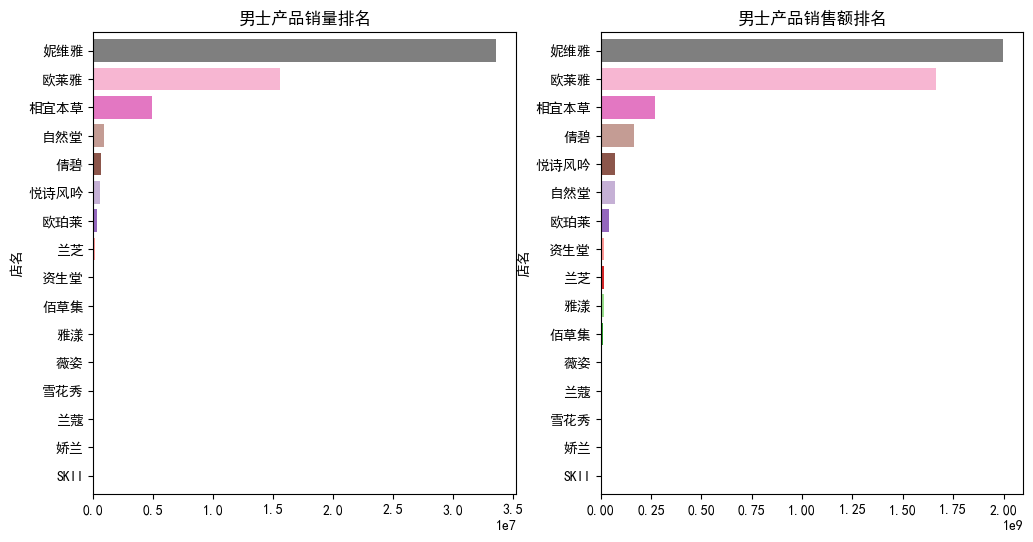

In [278]:
f,[ax1,ax2]=plt.subplots(1,2,figsize = (12,6))
man_data.groupby('店名').sale_count.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax1,color = colors)
ax1.set_title('男士产品销量排名')
man_data.groupby('店名').销售额.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax2,color = colors)
ax2.set_title('男士产品销售额排名')

plt.show()

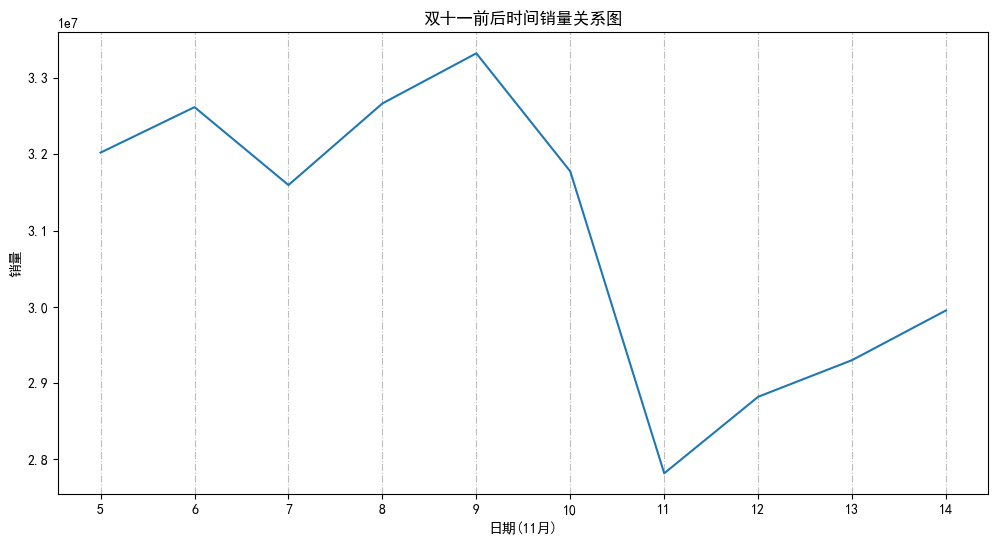

In [279]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize = (12,6))
data_deal.groupby('day')['sale_count'].sum().plot()
plt.grid(linestyle="-.", color="gray", axis="x", alpha=0.5)
x_major_locator = MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('日期(11月)')
plt.ylabel('销量')
ax.set_title('双十一前后时间销量关系图')
plt.show()